### Exploring Kickoff Data
Sean Steinle

1. [Introduction](#1)
2. [Exploratory Data Analysis](#2)
    - [Statistics](#2a)
    - [Issues](#2b)
    - [Grouping Metrics](#2c)

<a id='1'>

### Introduction

**A Foreword: generate_DF.py**

First, I should mention how we got to the data we have here. Most of the data scraping that creates the kickoff dataframe can be seen in *pbp_boxscores.ipynb*. This *generate_DF.py* file is a Python script that runs the *make_DF* function over a directory of ten csv files that contain boxscores of NFL games for each year of the 2010's. As such, the code that is unique to that script is generally working in reading in the different files, with a few notable exceptions. First, when reading in a csv, I added a column to the dataframe that kept track of which season the kickoff occurred during. This information is easily obtained by searching the filename string for four consecutive numbers. There are a number of other small changes I made, feel free to check them out yourself!

After running the generate_DF.py script, we now have a CSV file of around 28,000 kickoffs. This should be enough to make some basic observations about kickoffs over the past 10 years. In the next section, we'll use measures of central tendancy, graphs, and other measurements in order to come to some conclusions about kickoffs over the past decade.
<a id='2'>

### Exploratory Data Analysis

***Statistics***

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [2]:
df = pd.read_csv("kickoff_dataset.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'kicking_team', 'receiving_team', 'year', 'text',
       'kicker', 'isTouchback', 'isOutOfBounds', 'isOnside', 'isFairCatch',
       'kickYards', 'kickStart', 'kickLand', 'returner', 'tacklers',
       'returnYards', 'returnSpot', 'isReturned', 'isAdvanced', 'isTouchdown',
       'isMuff', 'retainsMuff', 'isPenalty', 'penalizedPlayer', 'penaltyYards',
       'penaltyType', 'penaltySpot', 'isFumble', 'retainsFumble', 'finalSpot'],
      dtype='object')

In [4]:
print(f"We've tracked {len(df.columns)-1} statistics over {len(df)} kickoffs. Here's a glimpse of the dataset:")
df.head()

We've tracked 29 statistics over 28315 kickoffs. Here's a glimpse of the dataset:


,Unnamed: 0,kicking_team,receiving_team,year,text,kicker,isTouchback,isOutOfBounds,isOnside,isFairCatch,...,isMuff,retainsMuff,isPenalty,penalizedPlayer,penaltyYards,penaltyType,penaltySpot,isFumble,retainsFumble,finalSpot
0,5,PIT,TEN,2009,J.Reed kicks 61 yards from PIT 30 to TEN 9. J....,J.Reed,False,False,False,False,...,False,True,True,G.McRath,10,Offensive Holding,72,False,True,82
1,15,MIN,CLE,2009,R.Longwell kicks 66 yards from MIN 30 to CLE 4...,R.Longwell,False,False,False,False,...,False,True,True,K.Maiava,10,Offensive Holding,71,False,True,81
2,45,NYJ,HOU,2009,J.Feely kicks 72 yards from NYJ 30 to HOU -2. ...,J.Feely,False,False,False,False,...,False,True,True,C.Thompson,10,Offensive Holding,70,False,True,80
3,47,NYJ,HOU,2009,J.Feely kicks 71 yards from NYJ 30 to HOU -1. ...,J.Feely,False,False,False,False,...,False,True,True,C.Thompson,10,Unnecessary Roughness,80,False,True,90
4,48,HOU,NYJ,2009,K.Brown kicks 67 yards from HOU 30 to NYJ 3. L...,K.Brown,False,False,False,False,...,False,True,True,J.Westerman,10,Offensive Holding,77,False,True,87


In [5]:
df.columns

Index(['Unnamed: 0', 'kicking_team', 'receiving_team', 'year', 'text',
       'kicker', 'isTouchback', 'isOutOfBounds', 'isOnside', 'isFairCatch',
       'kickYards', 'kickStart', 'kickLand', 'returner', 'tacklers',
       'returnYards', 'returnSpot', 'isReturned', 'isAdvanced', 'isTouchdown',
       'isMuff', 'retainsMuff', 'isPenalty', 'penalizedPlayer', 'penaltyYards',
       'penaltyType', 'penaltySpot', 'isFumble', 'retainsFumble', 'finalSpot'],
      dtype='object')

35

35

True

{'ARI',
 'ATL',
 'BAL',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HOU',
 'IND',
 'JAC',
 'JAX',
 'KC',
 'LA',
 'LAC',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEN',
 'WAS'}

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

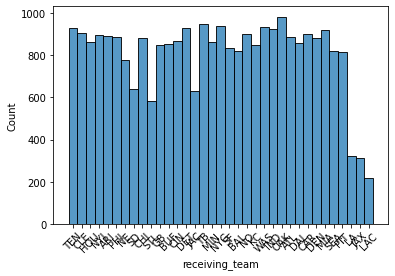

In [6]:
#Kicking and Receiving Teams
len(set(df["kicking_team"]))
len(set(df["receiving_team"]))
set(df["kicking_team"]) == set(df["receiving_team"])
set(df["receiving_team"])
plot = sns.histplot(data=df, x="receiving_team")
plt.xticks(rotation=45)
#So, we have 35 teams. We know there are only 32. What's the anomaly? This data is over ten years, so we have leftover
#abbreviations like STL, LA, JAC, SD, OAK, etc. You can see this borne out in that the smallest bars are new name changes.

In [7]:
#Kickers
len(set(df["kicker"]))
df["kicker"].value_counts()[:-20]

#What we learned from this is that our scraping of kickers is not very good! We need to go back and fix.

262

S.Gostkowski                                                                        939
M.Crosby                                                                            906
S.Hauschka                                                                          779
R.Succop                                                                            726
D.Bailey                                                                            716
                                                                                   ... 
T.Carter                                                                              1
(Onside Kick formation) D.Hopkins                                                     1
(Onside Kick formation) K.Forbath                                                     1
J.Scott                                                                               1
Kickoff moved to 50 because of the personal foul on the interception. T.Morstead      1
Name: kicker, Length: 242, dtype

In [8]:
#Returners
len(set(df["returner"]))
df["returner"].value_counts()[:-20]

#I'm no expert, but 1120 sounds abouuuut right? 1120 returns/32 teams/10 years of returns = 3-4 returners per team per year.

1120

no returner     13687
B.Tate            247
D.Harris          225
J.Cribbs          218
T.Ginn            213
                ...  
M.Crabtree          1
Be.Scott            1
D.Aromashodu        1
D.Goedert           1
B.Bolen             1
Name: returner, Length: 1100, dtype: int64

In [9]:
#penaltyType
len(set(df["penaltyType"]))
df["penaltyType"].value_counts()

#looks good

31

no penalty                               27170
Offensive Holding                          616
Illegal Block Above the Waist              206
Unnecessary Roughness                       88
Offside on Free Kick                        47
Face Mask                                   45
Personal Foul                               17
Low Block                                   16
Illegal Touch Kick                          16
Illegal Double-Team Block                   16
Illegal Use of Hands                        10
Illegal Formation                            9
Unsportsmanlike Conduct                      8
Horse Collar Tackle                          7
Illegal Blindside Block                      6
Offensive Offside                            5
Illegal Forward Pass                         5
Horse Collar                                 4
Illegal Wedge                                4
Defensive Holding                            3
Disqualification                             3
Taunting     

<AxesSubplot:xlabel='year', ylabel='count'>

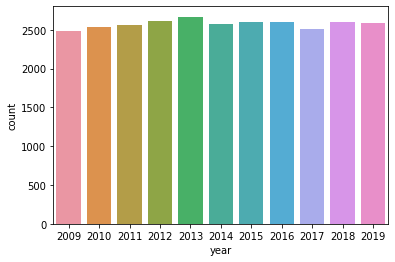

In [10]:
#Years
sns.countplot(data=df, x="year")

#This looks good! You wouldn't expect any one year to have more than another.

In [11]:
#isTouchback, isOutOfBounds, isOnside, isFairCatch, isReturned, isTouchdown, isMuff, retainsMuff, isPenalty, isFumble, retainsFumble
touchback = len(df[df["isTouchback"]])/len(df)
print(f"{touchback*100}% of kicks were touchbacks.")

oob = len(df[df["isOutOfBounds"]])/len(df)
print(f"{oob*100}% of kicks were out of bounds.")

fc = len(df[df["isFairCatch"]])/len(df)
print(f"{fc*100}% of kicks were fair catches.")

returned = len(df[df["isReturned"]])/len(df)
print(f"{returned*100}% of kicks were returned.")

td = len(df[df["isTouchdown"]])/len(df)
print(f"{td*100}% of kicks were returned for a touchdown.")

muff = len(df[df["isMuff"]])/len(df)
print(f"{muff*100}% of kicks were muffed.")

cut = df[df["isMuff"]]
rm = len(cut[cut["retainsMuff"]])/len(cut)
print(f"{rm*100}% of muffs were retained.")

penalty = len(df[df["isPenalty"]])/len(df)
print(f"{penalty*100}% of kickoffs had an accepted penalty.")

fumble = len(df[df["isFumble"]])/len(df)
print(f"{fumble*100}% of kicks were fumbled.")

cut = df[df["isFumble"]]
rf = len(cut[cut["retainsFumble"]])/len(cut)
print(f"{rf*100}% of fumbles were retained.")

#These numbers look to be about right. One immediate comparison we can do is fumbles lost and muffs kicks vs. touchdowns.

46.40649832244394% of kicks were touchbacks.
1.161928306551298% of kicks were out of bounds.
0.1553946671375596% of kicks were fair catches.
51.66166342927777% of kicks were returned.
0.42733533462828893% of kicks were returned for a touchdown.
0.8935193360409677% of kicks were muffed.
90.11857707509881% of muffs were retained.
4.043793042556949% of kickoffs had an accepted penalty.
1.0665724880805227% of kicks were fumbled.
46.35761589403973% of fumbles were retained.


63.75034434045559

9.68153720255043

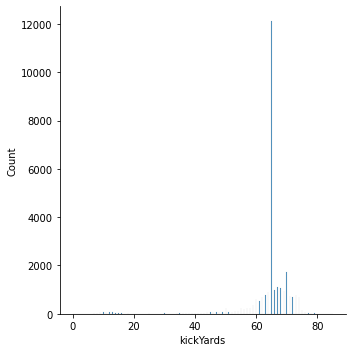

34.05915592442169

2.9306295527360198

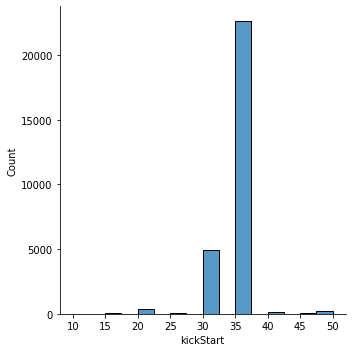

97.80950026487727

9.82359045084258

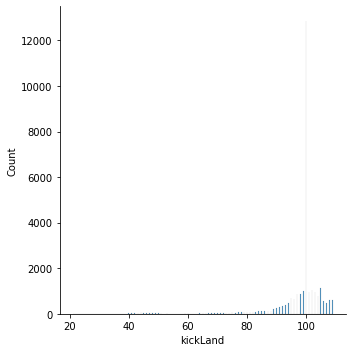

11.841568073459298

14.763595062253453

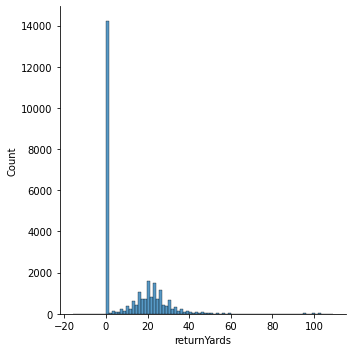

85.96793219141797

16.90106128595339

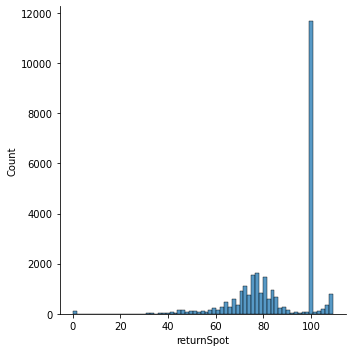

86.43475189828713

16.551949164963315

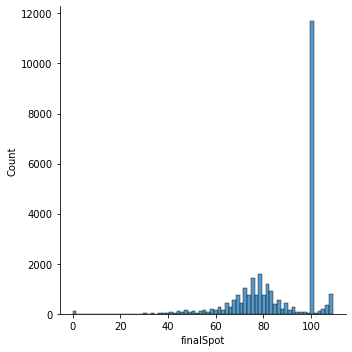

In [26]:
#kickYards, kickStart, kickLand, returnSpot, returnLand, finalSpot
np.mean(df["kickYards"])
np.std(df["kickYards"])
sns.displot(data=df, x="kickYards", kind="hist")
plt.show()
#almost every kick is between 60-70 yards

np.mean(df["kickStart"])
np.std(df["kickStart"])
sns.displot(data=df, x="kickStart", kind="hist")
plt.show()
#almost all kicks start at either 35 or 30. to be expected here. if you notice, seaborn actually used less bins b/c so many 0 values
#kicks used to start at the 30 before 2011.

np.mean(df["kickLand"])
np.std(df["kickLand"])
sns.displot(data=df, x="kickLand", kind="hist")
plt.show()
#this mirrors kickYards very well

np.mean(df["returnYards"])
np.std(df["returnYards"])
sns.displot(data=df, x="returnYards", kind="hist")
plt.show()
#mirrors return spot, good.

np.mean(df["returnSpot"])
np.std(df["returnSpot"])
sns.displot(data=df, x="returnSpot", kind="hist")
plt.show()
#looks good, you would expect this distribution with the exception of the huge number of 100's, which are all touchbacks.
#filter these out when you look at the yardage game

np.mean(df["finalSpot"])
np.std(df["finalSpot"])
sns.displot(data=df, x="finalSpot", kind="hist")
plt.show()


In [32]:
len(df[df["kickYards"]==67])/len(df)
len(df[df["kickYards"]==66])/len(df)
len(df[df["kickYards"]==65])/len(df)
len(df[df["kickYards"]==64])/len(df)
len(df[df["kickYards"]==63])/len(df)

#There's something to suggest that the recording of boxscores is actually incorrect here. Why should kicks land on the end zone
#yard exactly 10x more likely than a yard before or after? This is something to consider in the yardage game.

0.03966095708988169

0.03545823768320678

0.4280769909941727

0.03252692918947554

0.027865089175348755

<a id="2b">

***Issues***

1. The *kickYards* statistic is incorrect for a portion of the dataset. Since there is no line in boxscore descriptions that contains the final spotting of the ball, we have to construct this statistic. This calculation is sometimes very simple--for touchbacks, it's as easy as just saying "25 yards". On the other hand, it can get very complicated: consider an example where there is a penalty, fumbled ball, recovered ball, and then another penalty. I'm not sure what I'm going to do with this statistic at this time.
    - As of this minute, I think what you do is say all kicks fielded at the 1 yard line and out are only playable, and all kicks fielded at the goal line and back are playable or kneelable.
2. The *kickLand* statistic is also out of wack, but for reasons more unclear than *finalSpot*. About 80% of kicks land exactly on the goal line, according to our database. However, we know that this cannot possibly be. In fact, upon watching football and following along with the ESPN app, I saw a >65 yard kick be reported as "65 yards, Touchback". When we consider that we see the exact same pattern for all of the touchbacks in our data (which make up about half of the dataframe), we must assume that any touchback is reported as landing on the goal line. Let's test this theory.
3. The *kickers* statistic is scraped incorrectly. This is the first data I scraped, and for some reason I thought I could just take anything before the word "kick", so I used *box_score.split("kick")* as my rule. This is, and I can't understate this, bad. Will fix soon.

All of these are yet to be addressed, but I'm a little sick of data wrangling. Let's do some analysis of game altering plays while I rebuild a tolerance for RE.

<a id='2c'>

***Grouping Metrics***
Here, I'm going to group the more intensive analysis into groups.

1. *Game Altering Plays* - These metrics include fumbles, touchdowns, and muffs. In this section, we should compare the rates of very impactful kickoff successes (touchdowns) with very impactful kickoff failures (lost possessions such as lost fumbles and muffs, as well as touchdowns scored by the kicking team off of fumbles). I have a suspicion that these plays will be more failures than successes.
2. *The Yardage Game* - This group is the largest and is made up of the meatiest metrics: kickLand, returnYards, finalSpot, and more. For this group, it will be important to answer where the ball was fielded from, and where the ball is spotted after the play. In this section, we should see how often it is that the returner made it back to the 25 yard line, where a touchback would have placed them. It is important to note, however, that kicks fielded right in front of the endzone and forward don't come with the option of a touchback or return.
3. *Players, Teams, Years* - This group doesn't explicitly answer whether kicks should be returned or not, but it may be worth exploring. One hugely important detail here is that the NFL changed the touchback rule from possession at the 20 to possession at the 25 in 2016. It may be worth examining how this affected the game.